## Auto Encoders in Speech Recognition

In [2]:
import pandas as pd
import numpy as np

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

import os
import sys
import shutil

from sklearn.preprocessing import minmax_scale
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression


from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
import tensorflow as tf
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, UpSampling2D,add,BatchNormalization
os.makedirs("/kaggle/working/Happy")
os.makedirs("/kaggle/working/Sad")
i,j = 0
happy = []
sad = []
h=[]
s=[]
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## 1. Build the CNN model using MFCC and mel spectrogram features.

In [3]:
 Ravdess = "/kaggle/input/"

In [4]:
files = ('03-01-03-01-01-01',
        '03-01-03-01-01-02',
        '03-01-03-01-02-01',
        '03-01-03-01-02-02',
        '03-01-03-02-01-01',
        '03-01-03-02-01-02',
        '03-01-03-02-02-01',
        '03-01-03-02-02-02',
        '03-01-04-01-01-01',
        '03-01-04-01-01-02',
        '03-01-04-01-02-01',
        '03-01-04-01-02-02',
        '03-01-04-02-01-01',
        '03-01-04-02-01-02',
        '03-01-04-02-02-01',
        '03-01-04-02-02-02')

#### Happy has the start : "03-01-03"
#### Sad has start: "03-01-04"

In [ ]:
for dirname, _, filenames in os.walk(Ravdess):
    for filename in filenames:
        if filename.startswith(name):
            i = i+1
            if filename.startswith(("03-01-04")):
                shutil.copy(os.path.join(dirname, filename),"./Sad/")
            else:
                shutil.copy(os.path.join(dirname, filename),"./Happy/")

#### Creating MFCCS and Melspectrograms

In [14]:
sad_=[]
sad_1=[]

i=0

for dirname, _, filenames in os.walk('./'):
    if dirname == "./Sad":
        for filename in filenames:
            if filename.endswith(".wav"):
                a = os.path.join(dirname, filename)
                x, sr = librosa.load(a)
                mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128)
                mean = np.mean((mfccs).T,axis = 0)
                sad_.append(mean)
                mel = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128)
                mean = np.mean((mel).T,axis = 0)
                sad_1.append(mean)
                i = i+1
                if i == 250:
                    break
                
                
                
sad = pd.DataFrame(sad_,columns=range(1,129))
sad["Emotion"] = "Sad"
sad_1 = pd.DataFrame(sad_1,columns=range(1,129))
sad_1["Emotion"] = "Sad"                

In [15]:
happy_ = []
happy_1 = []

i=0


for dirname, _, filenames in os.walk('./'):
    if dirname == "./Happy":
        for filename in filenames:
            if filename.endswith(".wav"):
                a = os.path.join(dirname, filename)
                x, sr = librosa.load(a)
                mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128)
                mean = np.mean((mfccs).T,axis = 0)
                happy_.append(mean)
                mel = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128)
                mean = np.mean((mel).T,axis = 0)
                happy_1.append(mean)
                i = i+1
                if i == 250:
                    break
                    
                    
happy = pd.DataFrame(happy_,columns=range(1,129))
happy["Emotion"] = "Happy"
happy_1 = pd.DataFrame(happy_1,columns=range(1,129))
happy_1["Emotion"] = "Happy"   

In [16]:
mfccs = happy.append(sad)
mels = happy_1.append(sad_1)

In [ ]:
sad_feature = []
happy_feature = []
test_sad = []
test_happy = []

In [21]:
mfccs["Emotion"] = mfccs["Emotion"].replace({'Happy':1,'Sad':0})
mels["Emotion"] = mels["Emotion"].replace({"Happy": 1,"Sad": 0})

## 2. Do a comparative analysis on logistic regression model and CNN model.

In [82]:
X = mfccs.iloc[:,:-1]
y = mfccs.iloc[:,-1:]
X_ = mels.iloc[:,:-1]
y_ = mels.iloc[:,-1:]

#### Train-Test Split
    

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                        stratify = y)

In [84]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.2, 
                                                        stratify = y_)

### Scaling

In [47]:
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train_)
X_val_s = sc.transform(X_test)
X_train__s = sc.fit_transform(X_train_)
X_val__s = sc.transform(X_test_)

### Features extracted:

In [48]:
print(f'Features extracted MFCCS:  {X_train_s.shape[1]}')
print(f'Features extracted MELS:  {X_train__s.shape[1]}')

Features extracted MFCCS:  128
Features extracted MELS:  128


### LOGISTIC REGRESSION MODEL
#### Model Building

In [49]:
model_mfccs = LogisticRegression()
model_mfccs.fit(X_train_s,y_train)

model_mels = LogisticRegression()
model_mels.fit(X_train__s,y_train_)


LogisticRegression()

#### Prediction

In [50]:
y_train_pred = model_mfccs.predict(X_train_s)
y_test_pred = model_mfccs.predict(X_test)

y_train_pred_ = model_mels.predict(X_train__s)
y_test_pred_ = model_mels.predict(X_test_)

#### Accuracy and Confusion Matrix
Training accuracy and CM of MFCCs

In [51]:
print("Training accuracy MFCCS = ",accuracy_score(y_train,y_train_pred)*100)
print("Training accuracy Mels = ",accuracy_score(y_train_,y_train_pred_)*100)

Training accuracy MFCCS =  74.5928338762215
Training accuracy Mels =  81.10749185667753


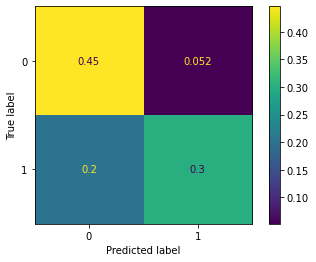

In [52]:
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize="all")

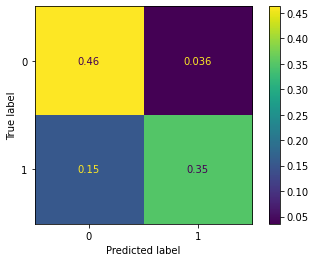

In [53]:
ConfusionMatrixDisplay.from_predictions(y_train_,y_train_pred_,normalize="all")

Testing Accuracy and CM

In [54]:
print("Testing accuracy MFCCS = ",accuracy_score(y_test,y_test_pred)*100)
print("Testing accuracy MELS = ",accuracy_score(y_test_,y_test_pred_)*100)

Testing accuracy MFCCS =  50.649350649350644
Testing accuracy MELS =  45.45454545454545


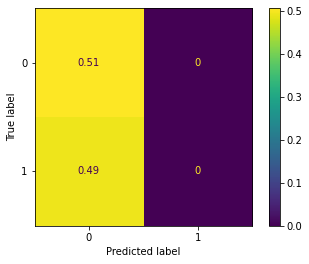

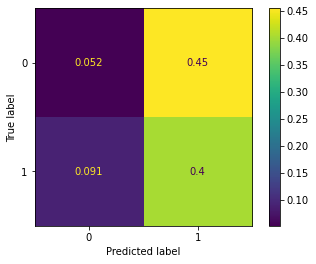

In [55]:
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,normalize="all")
ConfusionMatrixDisplay.from_predictions(y_test_,y_test_pred_,normalize="all")

### CNN Model

In [86]:
X_train = np.array(X_train).reshape(X_train.shape[0],16,8,1)
X_test = np.array(X_test).reshape(X_test.shape[0],16,8,1)

X_train_ = np.array(X_train).reshape(X_train_.shape[0],16,8,1)
X_test_ = np.array(X_test).reshape(X_test_.shape[0],16,8,1)

In [87]:
X_test.shape

(77, 16, 8, 1)

In [75]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(16, 8, 1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [76]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 8, 16)         160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 4, 16)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 4, 16)          2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 2, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                2064      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [77]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy', metrics='accuracy')

In [95]:
history_mels = model.fit(X_train_, y_train_, epochs=100,validation_data=(X_test_,y_test_))

Epoch 1/100
10/10 [==============================] - 0s 13ms/step - loss: 1.7472 - accuracy: 0.5049 - val_loss: 1.2097 - val_accuracy: 0.5714
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 1.3226 - accuracy: 0.5081 - val_loss: 1.2838 - val_accuracy: 0.5325
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 1.1997 - accuracy: 0.5342 - val_loss: 1.2117 - val_accuracy: 0.5065
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 1.0197 - accuracy: 0.6124 - val_loss: 1.4434 - val_accuracy: 0.5195
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 1.0241 - accuracy: 0.5244 - val_loss: 1.0778 - val_accuracy: 0.5584
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 0.8346 - accuracy: 0.5863 - val_loss: 1.4665 - val_accuracy: 0.5195
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 0.8721 - accuracy: 0.6124 - val_loss: 0.9209 - val_accuracy: 0.5584
Epoch 8/100


In [89]:
history_mfccs = model.fit(X_train, y_train, epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
10/10 [==============================] - 0s 12ms/step - loss: 0.9756 - accuracy: 0.4593 - val_loss: 0.8658 - val_accuracy: 0.4286
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.9131 - accuracy: 0.5244 - val_loss: 0.7834 - val_accuracy: 0.5455
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 0.8028 - accuracy: 0.5863 - val_loss: 0.7464 - val_accuracy: 0.5714
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 0.7448 - accuracy: 0.5765 - val_loss: 0.7445 - val_accuracy: 0.5714
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.7440 - accuracy: 0.6189 - val_loss: 0.7334 - val_accuracy: 0.5584
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 0.7219 - accuracy: 0.6319 - val_loss: 0.7621 - val_accuracy: 0.5714
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 0.6847 - accuracy: 0.6319 - val_loss: 0.7301 - val_accuracy: 0.5974
Epoch 8/100


MFCCS

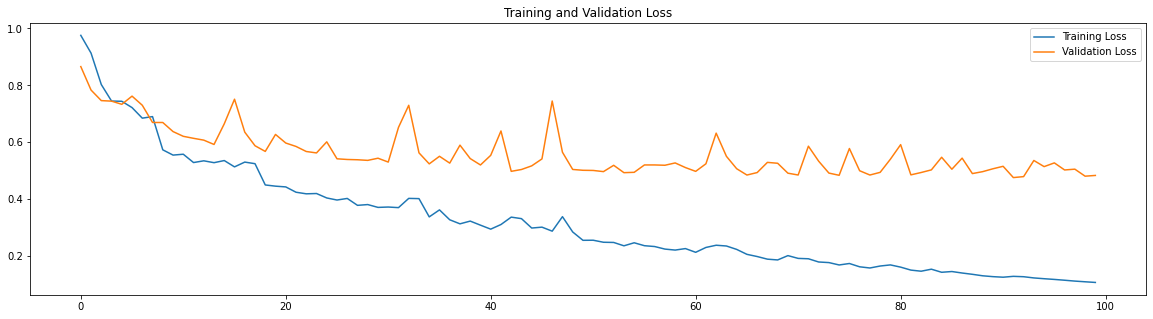

In [90]:
plt.figure(figsize=(20, 5))
loss = history_mfccs.history['loss']
val_loss = history_mfccs.history['val_loss']
plt.plot(loss, label='Training Loss')
plt.plot( val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

MELS

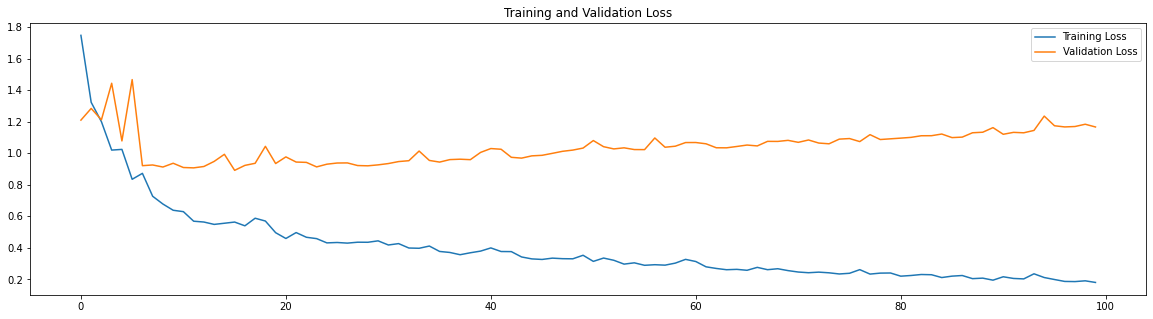

In [96]:
plt.figure(figsize=(20, 5))
loss = history_mels.history['loss']
val_loss = history_mels.history['val_loss']
plt.plot(loss, label='Training Loss')
plt.plot( val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Prediction 

In [92]:

y_train_pred = np.where(model.predict(X_train) > 0.5, 1,0)
y_test_pred = np.where(model.predict(X_test) > 0.5, 1,0)
    

y_train_pred_ = np.where(model.predict(X_train_) > 0.5, 1,0)
y_test_pred_ = np.where(model.predict(X_test_) > 0.5, 1,0)
        


In [97]:
y_train_pred_ = np.where(model.predict(X_train_) > 0.5, 1,0)
y_test_pred_ = np.where(model.predict(X_test_) > 0.5, 1,0)

#### Accuracy and Confusion Matrix MFCCS

Training accuracy =  98.69706840390879
Testing accuracy =  72.72727272727273


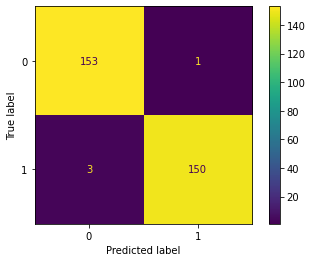

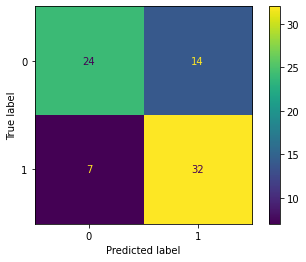

In [93]:
print("Training accuracy = ",accuracy_score(y_train,y_train_pred)*100)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)    

print("Testing accuracy = ",accuracy_score(y_test,y_test_pred)*100)
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)


#### Accuracy and Confusion Matrix Mels

Training accuracy =  98.69706840390879
Testing accuracy =  53.246753246753244


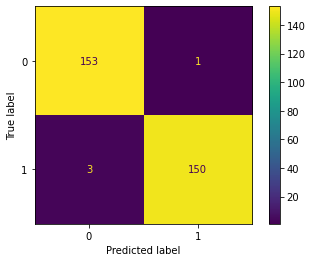

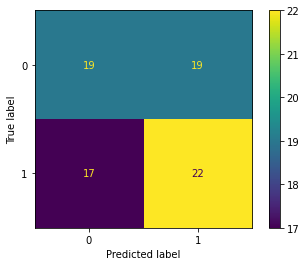

In [98]:
print("Training accuracy = ",accuracy_score(y_train_,y_train_pred_)*100)
ConfusionMatrixDisplay.from_predictions(y_train_,y_train_pred_)    

print("Testing accuracy = ",accuracy_score(y_test_,y_test_pred_)*100)
ConfusionMatrixDisplay.from_predictions(y_test_,y_test_pred_)


## 3. Build the autoencoder for happy audios, and compare the loss for sad audios through the autoencoders.

In [101]:
for dirname, _, filenames in os.walk('./'):
    if dirname == "./Happy":
        for filename in filenames:
            if filename.endswith(".wav"):
                h.append(filename)
    if dirname == "./Sad":
        for filename in filenames:
            if filename.endswith(".wav"):
                s.append(filename)
for i in h:
    for j in s:    
        x = i[:-4]
        y = j[:-4]
        split_x = x.split('-') 
        split_y = y.split('-')        
        if ((split_x[-1] == split_y[-1])and (split_x[-4] == split_y[-4]) and (split_x[-2] == split_y[-2])and (split_x[-3] == split_y[-3])):
            happy.append(i)
            sad.append(j)                

In [105]:
df["happy"] = happy
df["sad"] = sad
df["happy"] = './Happy/' + df["happy"]
df["sad"] = './Sad/' + df["sad"]

In [106]:
df

,happy,sad
0,./Happy/03-01-03-01-02-01-07.wav,./Sad/03-01-04-01-02-01-07.wav
1,./Happy/03-01-03-02-01-02-04.wav,./Sad/03-01-04-02-01-02-04.wav
2,./Happy/03-01-03-02-02-02-03.wav,./Sad/03-01-04-02-02-02-03.wav
3,./Happy/03-01-03-02-01-01-09.wav,./Sad/03-01-04-02-01-01-09.wav
4,./Happy/03-01-03-01-01-01-02.wav,./Sad/03-01-04-01-01-01-02.wav
...,...,...
187,./Happy/03-01-03-02-01-02-12.wav,./Sad/03-01-04-02-01-02-12.wav
188,./Happy/03-01-03-01-02-02-07.wav,./Sad/03-01-04-01-02-02-07.wav
189,./Happy/03-01-03-02-02-01-13.wav,./Sad/03-01-04-02-02-01-13.wav
190,./Happy/03-01-03-02-01-02-07.wav,./Sad/03-01-04-02-01-02-07.wav


In [145]:
training, testing = train_test_split(df, test_size=0.20)

In [110]:
for path in zip(range(training.shape[0]), training['sad'].values):
    x , sr = librosa.load(path)
    mfcc = librosa.feature.mfcc(y=x, sr=sr,n_fft = 256, n_mfcc=20)
    mfcc_t = mfcc.T
    N = mfcc_t.size
    if mfcc_t.shape != (256,20):
        mfcc_t = np.pad(mfcc_t, ((0,(256-mfcc_t.shape[0])),(0,0)), mode='constant')
    sad_feature.append(mfcc_t)
for path in zip(range(training.shape[0]), training['happy'].values):
    x , sr = librosa.load(path)
    mfcc = librosa.feature.mfcc(y=x, sr=sr,n_fft = 256, n_mfcc=20)
    mfcc_t = mfcc.T
    N = mfcc_t.size
    if mfcc_t.shape != (256,20):
        mfcc_t = np.pad(mfcc_t, ((0,(256-mfcc_t.shape[0])),(0,0)), mode='constant')
    happy_feature.append(mfcc_t)


In [114]:
for path in zip(range(testing.shape[0]), testing['sad'].values):
    x , sr = librosa.load(path)
    mfcc = librosa.feature.mfcc(y=x, sr=sr,n_fft = 256, n_mfcc=20)
    mfcc_t = mfcc.T
    N = mfcc_t.size
    if mfcc_t.shape != (256,20):
        mfcc_t = np.pad(mfcc_t, ((0,(256-mfcc_t.shape[0])),(0,0)), mode='constant')
    test_sad.append(mfcc_t)
for path in zip(range(testing.shape[0]), testing['happy'].values):
    x , sr = librosa.load(path)
    mfcc = librosa.feature.mfcc(y=x, sr=sr,n_fft = 256, n_mfcc=20)
    mfcc_t = mfcc.T
    N = mfcc_t.size
    if mfcc_t.shape != (256,20):
        mfcc_t = np.pad(mfcc_t, ((0,(256-mfcc_t.shape[0])),(0,0)), mode='constant')
    test_happy.append(mfcc_t)


In [116]:
np.array(test_happy).shape, np.array(test_sad).shape

((39, 256, 20), (39, 256, 20))

In [117]:
np.array(happy_feature).shape,np.array(sad_feature).shape

((153, 256, 20), (153, 256, 20))

In [118]:
happy_train = np.array(happy_feature).reshape(153,256,20,1)
sad_train = np.array(sad_feature).reshape(153,256,20,1)
happy_test = np.array(test_happy).reshape(39,256,20,1)
sad_test = np.array(test_sad).reshape(39,256,20,1)

In [130]:
happy_train.shape

(153, 256, 20, 1)

In [131]:
sad_train.shape

(153, 256, 20, 1)

In [133]:
happy_test.shape

(39, 256, 20, 1)

In [134]:
sad_test.shape

(39, 256, 20, 1)

In [153]:
tf.keras.backend.clear_session()
class SpeechAE(tf.keras.models.Model):
    def __init__(self):
        super(SpeechAE, self).__init__()
        self.encoder = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(256, 20, 1)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(2, 2)])

        self.decoder = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.UpSampling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.UpSampling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = SpeechAE()


In [154]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
history = autoencoder.fit(train_happy, train_happy, epochs=50,
                         validation_data = (test_happy,test_sad))

Epoch 1/50
5/5 [==============================] - 6s 1s/step - loss: -5304040816640.0000 - val_loss: -7301324865536.0000
Epoch 2/50
5/5 [==============================] - 7s 2s/step - loss: -8085454192640.0000 - val_loss: -10994974720000.0000
Epoch 3/50
5/5 [==============================] - 6s 1s/step - loss: -12062128340992.0000 - val_loss: -16246417391616.0000
Epoch 4/50
5/5 [==============================] - 6s 1s/step - loss: -17700382310400.0000 - val_loss: -23584235847680.0000
Epoch 5/50
5/5 [==============================] - 7s 1s/step - loss: -25557695725568.0000 - val_loss: -33683161481216.0000
Epoch 6/50
5/5 [==============================] - 7s 1s/step - loss: -36287973163008.0000 - val_loss: -47388571992064.0000
Epoch 7/50
5/5 [==============================] - 8s 2s/step - loss: -50649521717248.0000 - val_loss: -65751226515456.0000
Epoch 8/50
5/5 [==============================] - 7s 1s/step - loss: -70025251651584.0000 - val_loss: -90000225992704.0000
Epoch 9/50
5/5 [===

In [157]:
a = happy_train[1]
np.array(a).shape

(256, 20, 1)

In [158]:
sample = np.array(test_happy[0]).reshape(1,256,20,1)
encoded_sample = autoencoder.encoder(sample).numpy()
decoded_sample = autoencoder.decoder(encoded_sample).numpy()
decoded_sample.shape

(1, 256, 20, 1)

In [163]:
mfcc_x = librosa.feature.inverse.mfcc_to_audio(decoded_sample.reshape(256, 20))
sf.write('example.wav', mfcc_x, 20000)

In [164]:
ipd.Audio('example.wav')

## 4. Build variational autoencoder for the same data

In [169]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [193]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


In [194]:
latent_dim = 2

encoder_inputs = keras.Input(shape=(256, 20, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 256, 20, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 128, 10, 32)  320         input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 64, 5, 64)    18496       conv2d_8[0][0]                   
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 20480)        0           conv2d_9[0][0]                   
____________________________________________________________________________________________

In [195]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(64 * 5 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((64, 5, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 20480)             61440     
_________________________________________________________________
reshape_2 (Reshape)          (None, 64, 5, 64)         0         
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 128, 10, 64)       36928     
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 256, 20, 32)       18464     
_________________________________________________________________
conv2d_transpose_8 (Conv2DTr (None, 256, 20, 1)        289       
Total params: 117,121
Trainable params: 117,121
Non-trainable params: 0
_____________________________________________________

In [196]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [197]:
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())

In [205]:
history = vae.fit(train_happy,epochs=50)

Epoch 1/50
5/5 [==============================] - 1s 156ms/step - loss: -70709817344.0000 - reconstruction_loss: -84231151616.0000 - kl_loss: 17265356.0000
Epoch 2/50
5/5 [==============================] - 1s 134ms/step - loss: -203664419498.6667 - reconstruction_loss: -246236086272.0000 - kl_loss: 65100936.0000
Epoch 3/50
5/5 [==============================] - 1s 147ms/step - loss: -599444865024.0000 - reconstruction_loss: -717477249024.0000 - kl_loss: 257993504.0000
Epoch 4/50
5/5 [==============================] - 1s 132ms/step - loss: -1652421798570.6667 - reconstruction_loss: -1938180145152.0000 - kl_loss: 919435648.0000
Epoch 5/50
5/5 [==============================] - 1s 133ms/step - loss: -4151132509525.3335 - reconstruction_loss: -4814273511424.0000 - kl_loss: 2886999040.0000
Epoch 6/50
5/5 [==============================] - 1s 136ms/step - loss: -9639972394325.3340 - reconstruction_loss: -11156052770816.0000 - kl_loss: 8132459008.0000
Epoch 7/50
5/5 [=========================

In [199]:
x= train_happy[1]
np.array(x).shape

(256, 20, 1)

In [200]:
sample = np.array(test_happy[0]).reshape(1,256,20,1)
mean,log_var, x= vae.encoder(sample)
decoded_sample = vae.decoder(x).numpy()
decoded_sample.shape

(1, 256, 20, 1)

In [202]:
mfccs = librosa.feature.inverse.mfcc_to_audio(decoded_sample.reshape(256, 20))
sf.write('example1.wav', mfccs, 20000)

In [203]:
ipd.Audio('example1.wav')

##  5. Which model performs well? Comment.

### Both models could not recreate the audio files however applying some changes to the models may help or taking some additional features.